---
title: "Text Analysis and NLP Project: Investigating the impact of gender on chatGPT generated texts"
author:
  - Niloufar Shokri

date: 2023-05-17

abstract: " "

format: 
  html:  
    code-fold: true
    standalone: true
    embed-resources: true
    number-sections: true # numbering the header
    toc: true
    toc-depth: 4
---


## Executive Summary
<p style="text-align: justify;">
The objective of this project is to evaluate if the texts generated by chatGPT language model can be classified by gender using machine learning algorithms. In order to perform this project, the Blog Authorship Corpus dataset was used to train the word2vec and also classification algorithms. This dataset contains blog posts written by various authors with gender labels.
</p>

<p style="text-align: justify;">
In the first step, the texts in the blog dataset were preprocessed, which included text cleaning, tokenization, lemmatization, etc. Then the dataset was splitted into training and testing datasets and they were both transformed into numerical vectors using Word2Vec word embedding algorithm. Then, several classification algorithms such as logistic regression, decision tree, and LSTM were trained on the train dataset and were tested on the test dataset. Regarding the evaluation metrics, the classifiers' performance were relatively poor.
</p>

<p style="text-align: justify;">
In the next step, chatGPT language model was used to generate texts, and the texts were labeled by gender. Then, the dataset was cleaned using the same preprocessing steps and was transformed into numerical vevtors using the the word2vec model which was trained on the Blog Authorship Corpus dataset. Finally, the same classifier algorithms were used to predict the gender on the dataset. In this part, once the classifiers which were trained on the Blog Authorship Corpus dataset were used and again the chatgpt dataset was divided into train and test datasets and the classifiers were trained usding the train dataset and the used to predict on the test dataset. The classifiers trained on Blog Authorship Corpus dataset had better performance than those trained on chatGPT dataset. However, they had worse classification metrics in comparision to Blog Authorship Corpus dataset.
</p>

<p style="text-align: justify;">
Basically, it can be infered from the results that gender does not have a significant affect on the text structure. However, It would be worthful to apply other word embedding models like GloVe or fastText. Moreover, more complex deep learning architectures can be used, such as transformer models, attention mechanisms, and recurrent neural networks (RNNs), which are created expressly for text classification tasks.
</p>

## Introduction
<p style="text-align: justify;">
The use of language models like GPT-3 has become increasingly popular for various tasks, including text generation. These language models have shown remarkable performance in generating high-quality texts, and their potential applications are vast. However, there is limited research on how these models perform across different demographic groups. Gender is a critical demographic variable that can significantly affect the way people communicate. Investigating the impact of this variable on text generated by chatGPT-3 can provide insights into the effectiveness and potential biases of these models.
</p>

<p style="text-align: justify;">
Therefore, there is a need to understand how these language models perform across different demographic groups. In this project, the impact of gender on text generated by chatGPT-3 will be investigated to see if there is a significant difference between generated texts for demographic groups. To do this, the Blog Authorship Corpus dataset from Kaggle was chosen as the reference dataset, which contains blog post labeled by gender. Different Machine Learning (ML) methods are utilized to train the classifiers to predict the gender. Then, these models are applied on chatGPT-generated texts and the classification metrics are compared to those obtained on the Blog Authorship Corpus dataset. At the end, I can interpret if chatGPT takes gender into account while generating the texts. The chatGPT dataset is created by asking pre-defined questions. 
</p>

## About Dataset
<p style="text-align: justify;">
The dataset chosen for this project is the Blog Authorship Corpus dataset from Kaggle dataset, which contains text from blogs written on or before 2004, with each blog being the work of a single user. The dataset consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person.
The dataset is provided in csv type. After importing the dataset, the first step is getting some information about shape of the data set and variables. The features of the raw dataset with their corresponding descriptions are as below.
</p>


In [ ]:
# importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

import re
import nltk
import string

from wordcloud import WordCloud, STOPWORDS

from string import punctuation
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer
import gensim.downloader as api
import spacy

import keras
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import ReduceLROnPlateau

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, average_precision_score, recall_score, precision_score, roc_auc_score

In [ ]:
# Reading the data
rawdf = pd.read_csv('blogtext.csv')
rawdf.rename(columns={'text': 'blog'}, inplace=True)

rawdf.head()

,id,gender,age,topic,sign,date,blog
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [ ]:
# Information of each column
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   blog    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [ ]:
#| include: False
rawdf.shape

(681284, 7)

Regarding the below countplot based on the gender, it can be seen than the dataset is almost balanced.

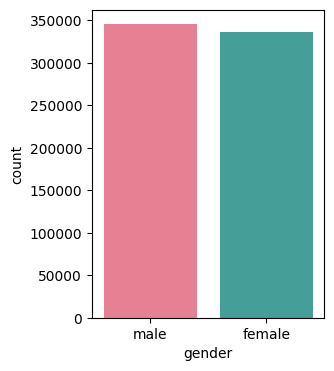

In [ ]:
plt.figure(figsize=(3,4));
sns.countplot(x='gender', data=rawdf, palette='husl');

Here is the topics of the blogs. There were 40 topics in total.

In [ ]:
print(rawdf['topic'].unique())
print("The number of topics are ", len(list(rawdf['topic'].unique())))

['Student' 'InvestmentBanking' 'indUnk' 'Non-Profit' 'Banking' 'Education'
 'Engineering' 'Science' 'Communications-Media' 'BusinessServices'
 'Sports-Recreation' 'Arts' 'Internet' 'Museums-Libraries' 'Accounting'
 'Technology' 'Law' 'Consulting' 'Automotive' 'Religion' 'Fashion'
 'Publishing' 'Marketing' 'LawEnforcement-Security' 'HumanResources'
 'Telecommunications' 'Military' 'Government' 'Transportation'
 'Architecture' 'Advertising' 'Agriculture' 'Biotech' 'RealEstate'
 'Manufacturing' 'Construction' 'Chemicals' 'Maritime' 'Tourism'
 'Environment']
The number of topics are  40


In [ ]:
df = rawdf.copy()

In addition, the average lendth of the blogs are approximately 1120 words.

In [ ]:
# Size of the texts
total_length = 0
num_texts = len(rawdf['blog'])
for text in rawdf['blog']:
    total_length += len(text)

avg_length = total_length / num_texts

print(f"The average length of the texts is {avg_length}")


The average length of the texts is 1120.7306982110251


## Text Pre-processing
<p style="text-align: justify;">
The text pre-processing is a very critical step because better results can only be achieved with good quality of data. Since the blog texts are unstructured or in other words, they are raw and very noisy, they require cleaning. The main objective of this step is to remove noisy and inconsistent texts.
Blogs that carry very little weighting in text context, for example numbers, special character, punctuations, hashtags, extra blank space, etc. need to be removed. 
The following steps are taken for the text cleaning.
</p>

### Removing special characters, lowercasing
<p style="text-align: justify;">
Unstructured texts such as Blogs may contain numbers, special characters, punctuations, hashtags, extra blank space, etc. We need to remove them from the texts. Therefore, I This function performs the following steps: 
</p>

* removing any word which starts with @.
* removing all non-alphabetic characters in the string with spaces.
* changing all the letters into lower case.
* replacing more than one space with one space and removing any leading and trailing space.
* filtering out any punctuation marks from the text.

### Tokenization
<p style="text-align: justify;">
Tokenization is the process of breaking a piece of text or a document into smaller units called tokens. The purpose of tokenization is to convert a continuous stream of text into discrete units that can be easily processed by computers. Tokenization is a critical step in natural language processing and text analysis, as many algorithms and techniques require text to be in a tokenized format.
To tokenize the text, I used wordpunct_tokenize() from NLTK library. It is a tokenizer that separates a piece of text into individual tokens or words. This function splits words based on any non-alphanumeric character such as punctuation marks or special characters.
</p>

### Removing Numbers
<p style="text-align: justify;">
Removing numbers from text for text analysis may be necessary depending on the context and purpose of the analysis. As the texts of this project are blog posts and I want to focus on language patterns, numbers may not be relevant to the analysis. Therefore, removing numbers can make the text more consistent.
After tokenizing the texts, I removed any token which was a digit. 
</p>

### English Language detection
<p style="text-align: justify;">
It is important to ensure that the language of the texts is English, because it allows for more accurate and effective analysis of the text. Many NLP techniques and tools are language-specific and have been trained specifically on English language data.
To do so, I applied a filter on the tokenized texts which checks if the token is in the set of English words from the nltk.corpus.words module.


### Removing stop-words
<p style="text-align: justify;">
Stop words are words that are very common in a language and are generally considered to be of little value in terms of conveying meaning. Examples of stop words in English include "the", "a", "an", "and", "but", "in", "on", etc. Non-stop words, on the other hand, are considered to be more important in conveying meaning. These words may include nouns, verbs, adjectives, adverbs, and other parts of speech. In text analysis, it is often useful to filter out stop words. Therefore, I compared each word of the blog texts with the NLTK's English stop words list, which includes a pre-defined list of common stop-words, and kept only the non-stop words. 
</p>

### lemmatizing the words
<p style="text-align: justify;">
Lemmatization is the process of reducing a word to its base or root form, which is called the "lemma". The goal of lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. By reducing words to their base form, we can reduce the total number of unique words in a text, which can make it easier to perform text analysis. Lemmatization is often used as a way to standardize words and reduce the sparsity of the data.
In this project, I used the NLTK's WordNetLemmatizer as the lemmatization tool. The tool uses a combination of morphological analysis and part-of-speech tagging to determine the base form of a word. The part-of-speech of the word is important, as the lemma may differ depending on whether the word is used as a noun, verb, adjective, or adverb. 
</p>

<p style="text-align: justify;">
I defined a function named <b>text_cleaner</b> which concluded the above-mentioned steps. The dataset contains a large amount of data and the text pre-processing is a time and memory consuming task. In order to make sure that this part is done completely and without runtime error, I divided the dataset into 10 parts and performed the data pre-processing for each part separately. Then I concatenated all these parts together and saved it on the computer memory. The text pre-processing took approximately 350 minutes.
</p>


In [ ]:
#| include: False
# %run txtprepro.ipynb

In [ ]:
# Deviding the dataset into 10 parts
part_1 = df.iloc[0:68130,:]
part_2 = df.iloc[68130:136260,:]
part_3 = df.iloc[136260:204390,:]
part_4 = df.iloc[204390:272520,:]
part_5 = df.iloc[272520:340650,:]
part_6 = df.iloc[340650:408780,:]
part_7 = df.iloc[408780:476910,:]
part_8 = df.iloc[476910:545040,:]
part_9 = df.iloc[545040:613170,:]
part_10 = df.iloc[613170:,:]

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize(tokens):
    pos_tags = pos_tag(tokens)
    wn_pos_tags = {'N': 'n', 'V': 'v', 'R': 'r', 'J': 'a'}
    
    # Lemmatize each word based on its POS tag
    lemmas = []
    for token, pos in pos_tags:
        pos = wn_pos_tags.get(pos[0].upper(), 'n')  # If the POS tag is not recognized, default to noun (n)
        lemma = lemmatizer.lemmatize(token, pos=pos)
        lemmas.append(lemma)
    return lemmas

In [ ]:
# Text Processing in a single code
words = set(nltk.corpus.words.words())
def text_cleaner(blogs):
    blogs = " ".join(filter(lambda x: x[0]!= '@' , blogs.split())) # removes any word which starts with @.
    blogs = re.sub('[^0-9a-zA-Z]', ' ', blogs) # substitute all non-alphabetic characters in the string with spaces.
    blogs = blogs.lower() # lowercasing
    blogs = re.sub(' +', ' ', blogs).strip() # replacing more than one space with 1 space and remove any leading and trailing space.
    blogs = nltk.wordpunct_tokenize(blogs)
    blogs = [word for word in blogs if not word.isdigit()]
    blogs = [word for word in blogs if word.lower() in words or not word.isalpha()]
    blogs = [word for word in blogs if word not in string.punctuation] # filtering out any punctuation marks from the string.
    blogs = [word for word in blogs if not word in set(stopwords.words('english'))] # Keeping only the non-stop words in the string
    blogs = lemmatize(blogs)
    blogs = " ".join(blogs)
    return blogs


In [ ]:
part_1['clean_blog']=part_1['blog'].apply(text_cleaner)

In [ ]:
part_2['clean_blog']=part_2['blog'].apply(text_cleaner)

In [ ]:
part_3['clean_blog']=part_3['blog'].apply(text_cleaner)

In [ ]:
part_4['clean_blog']=part_4['blog'].apply(text_cleaner)

In [ ]:
part_5['clean_blog']=part_5['blog'].apply(text_cleaner)

In [ ]:
part_6['clean_blog']=part_6['blog'].apply(text_cleaner)

In [ ]:
part_7['clean_blog']=part_7['blog'].apply(text_cleaner)

In [ ]:
part_8['clean_blog']=part_8['blog'].apply(text_cleaner)

In [ ]:
part_9['clean_blog']=part_9['blog'].apply(text_cleaner)

In [ ]:
part_10['clean_blog']=part_10['blog'].apply(text_cleaner)

In [ ]:
cleandf = pd.concat([part_1, part_2, part_3, part_4, part_5, part_6, part_7, part_8, part_9, part_10])


In [ ]:
tokenized_text = []
for i in cleandf['clean_blog']:
    x =  word_tokenize(i)
    tokenized_text.append(x)
cleandf['tokenized'] = tokenized_text

In [ ]:
cleandf.to_csv(r'cleandf.csv', index = False)

## Data Cleaning
<p style="text-align: justify;">
After text pre-processing, 12450 null text were created. It means that all the words from the text were removed according to the cleaning process. I removed these NaN values from dataset. The shape of the dataset reduces into 668834.
Here are some examples of the blog texts that became NaN after pre-processing:
</p>

In [ ]:
#| include: False
df = pd.read_csv('cleandf.csv')
df.head()

,id,gender,age,topic,sign,date,blog,clean_blog,tokenized
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",find wait untill team leader,"['find', 'wait', 'untill', 'team', 'leader']"
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,team van mail mail mail,"['team', 'van', 'mail', 'mail', 'mail']"
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,het van build h bomb humor subject build h bom...,"['het', 'van', 'build', 'h', 'bomb', 'humor', ..."
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,test test,"['test', 'test']"
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo capture show cool link pop k pop ...,"['thanks', 'yahoo', 'capture', 'show', 'cool',..."


In [ ]:
print('The number of NaN-values in the pre-processed dataset is: ', df['clean_blog'].isnull().sum())

The number of NaN-values in the pre-processed dataset is:  12450


In [ ]:
df.loc[df['clean_blog'].isnull()].head()

,id,gender,age,topic,sign,date,blog,clean_blog,tokenized
150,3705830,male,25,Non-Profit,Cancer,"17,July,2004",&nbsp; &nbsp;,NaN,[]
716,3667495,male,15,Science,Libra,"28,June,2004",,NaN,[]
786,3168577,male,23,indUnk,Sagittarius,"17,July,2004",urlLink meow 3&nbsp; urlLink,NaN,[]
788,3168577,male,23,indUnk,Sagittarius,"17,July,2004",urlLink me..oww &nbsp; urlLink,NaN,[]
803,3168577,male,23,indUnk,Sagittarius,"09,July,2004",urlLink What about now?&nbsp; urlLi...,NaN,[]


In [ ]:
#| include: False
df.dropna(axis = 0, inplace = True)
df.shape

(668834, 9)

## Data Visualisation
### Comparing the text length with boxplot and histogram
<p style="text-align: justify;">
In this part of the project, I compared the length of the blogs by gender category. Therefor I added the text_lenght variable to my dataset. By getting the statistical information on this column, It can seen that there are 1757 blogs which contain more than 5000 texts which is not too much comparing to the size of the dataset. In order to have a better visualisation in boxplot and histogram of the text_length variable, the dataset was filtered for texts with less than 5000 words. 
In both box plot and histogram, a significant difference is not observed.
</p>

In [ ]:
df['blog_length'] = df['blog'].str.len()
df['clean_blog_length'] = df['clean_blog'].str.len()
df.head()

,id,gender,age,topic,sign,date,blog,clean_blog,tokenized,blog_length,clean_blog_length
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",find wait untill team leader,"['find', 'wait', 'untill', 'team', 'leader']",157,28
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,team van mail mail mail,"['team', 'van', 'mail', 'mail', 'mail']",181,23
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,het van build h bomb humor subject build h bom...,"['het', 'van', 'build', 'h', 'bomb', 'humor', ...",25467,12378
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,test test,"['test', 'test']",43,9
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo capture show cool link pop k pop ...,"['thanks', 'yahoo', 'capture', 'show', 'cool',...",402,173


In [ ]:
df[df['clean_blog_length']>5000].shape

(1761, 11)

In [ ]:
#| include: False
df['clean_blog_length'].describe()

count    668834.000000
mean        474.085156
std         988.269317
min           1.000000
25%          91.000000
50%         267.000000
75%         597.000000
max      311779.000000
Name: clean_blog_length, dtype: float64

<p style="text-align: justify;">
The below boxplots show that the length of the texts written by both genders have almost the same distribution with many outlayers and the average lenghth for female writers is slightly longer than those of male writers.
</p>

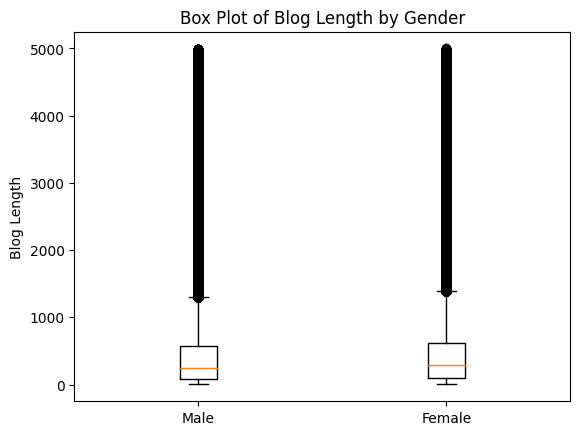

In [ ]:
# Boxplots of text lenghth
plt.figsize = (9,3)
filtered_blogs = df[df['clean_blog_length'] < 5000]

male_lengths = filtered_blogs[filtered_blogs['gender'] == 'male']['clean_blog_length']
female_lengths = filtered_blogs[filtered_blogs['gender'] == 'female']['clean_blog_length']

plt.boxplot([male_lengths, female_lengths], labels=['Male', 'Female'])
plt.ylabel('Blog Length')
plt.title('Box Plot of Blog Length by Gender')
plt.show()


The below histograms show the distribution of the length of the texts written by both genders are right-skewed, with many outlayers of more than 3000 words in texts.

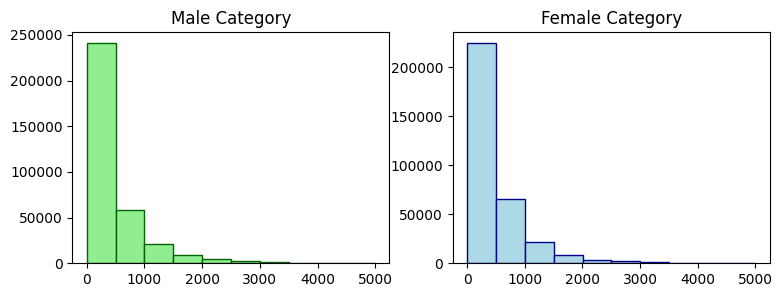

In [ ]:
# Histogram of blog length

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (9,3))

txtlen_male = filtered_blogs[filtered_blogs['gender']=='male']['clean_blog'].str.len()
ax1.hist(txtlen_male, color = 'lightgreen', edgecolor='darkgreen')
ax1.set_title('Male Category')

txtlen_female = filtered_blogs[filtered_blogs['gender']=='female']['clean_blog'].str.len()
ax2.hist(txtlen_female, color = 'lightblue', edgecolor='darkblue')
ax2.set_title('Female Category')

plt.show()

### Word Cloud
<p style="text-align: justify;">
In the following, the word cloud for each of the label categories (female and male) is plotted to provide a quick overview of the most prominent words in their blogs. A word cloud is a visualization tool that is used to represent text data. It displays a collection of words in which the size of each word represents its frequency in the text. Words that appear more frequently in the text are displayed with larger font size, and less frequently used words are displayed with smaller font size. In this study, it would be helpful identify patterns or trends.
The plots depict that there are some words in male writer blogs such as even, like, one, also that are most frequent. However in the female writer blogs, there is not special prominent words.
</p>

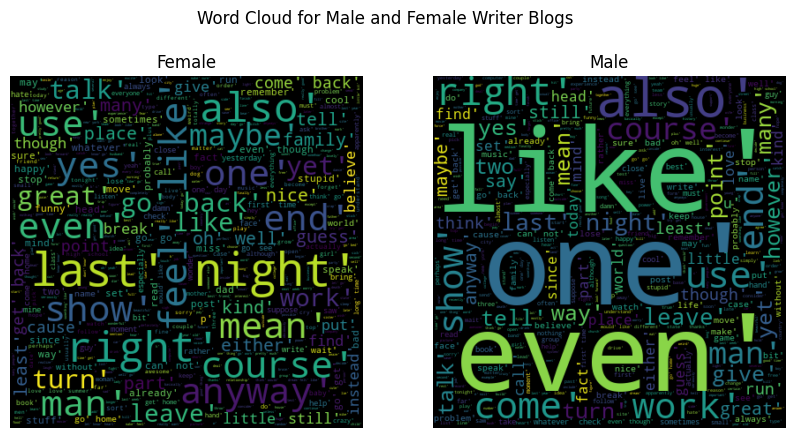

In [ ]:
# Word Cloud
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

female_text = ' '.join(df[df['gender']=='female']['tokenized'])
wordcloud_female = WordCloud(max_words=1500, width=400, height=400).generate(female_text)

male_text = ' '.join(df[df['gender']=='male']['tokenized'])
wordcloud_male = WordCloud(max_words=1500, width=400, height=400).generate(male_text)

ax1.imshow(wordcloud_female, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Female')

ax2.imshow(wordcloud_male, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Male')

plt.suptitle('Word Cloud for Male and Female Writer Blogs');

## Dropping the unnessecary columns
<p style="text-align: justify;">
The objective of this project is to train a classification model on the blog text and the gender label. So other columns ('id', 'age', 'topic', 'sign', 'date') are removed from the dataset and it would be ready for nexts steps.
</p>

In [ ]:
# Removing unnecessary columns
df.drop(['id','topic','age', 'blog', 'clean_blog', 'sign','date','blog_length','clean_blog_length'],axis = 1, inplace = True)

In [ ]:
#| include: False
df.head()

,gender,tokenized
0,male,"['find', 'wait', 'untill', 'team', 'leader']"
1,male,"['team', 'van', 'mail', 'mail', 'mail']"
2,male,"['het', 'van', 'build', 'h', 'bomb', 'humor', ..."
3,male,"['test', 'test']"
4,male,"['thanks', 'yahoo', 'capture', 'show', 'cool',..."


## Data Transformation
### Transforming the categorical variables
<p style="text-align: justify;">
The <b>gender</b> column which is our target variable is string. In order to use it in our machine learning model, it must be converted to number. I used `LabelEncoder` which encodes categorical labels as numerical values. 
</p>

In [ ]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [ ]:
#| include: False
df.head()

,gender,tokenized
0,1,"['find', 'wait', 'untill', 'team', 'leader']"
1,1,"['team', 'van', 'mail', 'mail', 'mail']"
2,1,"['het', 'van', 'build', 'h', 'bomb', 'humor', ..."
3,1,"['test', 'test']"
4,1,"['thanks', 'yahoo', 'capture', 'show', 'cool',..."


### Training the Word2vec Model
<p style="text-align: justify;">
Text data is in the form of strings, but machine learning models work with numerical data. Therefore, The text bust be converted text to numbers. In order to transfer the texts, I used the Word2Vec technique.
Word2Vec is a neural network-based technique for converting text to numerical vectors. It represents each word in the text as a high-dimensional vector, where words that appear in similar contexts have similar vectors. Word2Vec can capture the semantic and syntactic relationships between words in a text, and this makes it a powerful technique for natural language processing (NLP) tasks such as text classification. 
</p>

In used the following hyperparameters for my word2vec model.

* vector_size = 100: The vector_size parameter refers to the size of the embedding vector that is learned for each word in the vocabulary. This parameter determines the number of dimensions in the continuous vector space used to represent words. For example, if size_dim=100, each word in the vocabulary will be represented as a vector of 100 floating point values.
* window = 4: The window parameter specifies the maximum distance between the current word and the predicted word within a sentence. In other words, it determines the size of the window of words that the algorithm considers when predicting the next word in a sentence.
* min_count = 10: This parameter specifies the minimum count of a word that is needed to be included in the vocabulary. The words that occur less than min_count times in the corpus are ignored and not included in the model training process. This parameter is used to filter out rare words, which may not be useful for training a model, and may introduce noise in the final embeddings.
* sg = 1: In Word2Vec model, sg stands for "skip-gram". It is one of the two algorithms used in Word2Vec, the other being "continuous bag of words (CBOW)". The skip-gram model predicts the context words (surrounding words) given a target word, whereas the CBOW model predicts the target word given the context words. The skip-gram model is known to work well with large datasets and rare words, while the CBOW model is faster and works better for frequent words. In Gensim's Word2Vec class, sg=0 corresponds to CBOW, and sg=1 corresponds to Skip-gram. 

<p style="text-align: justify;">
After defining the model and selecting the hyperparameters, I trained it using all the texts in the dataset and then transformed my blog dataset into numeric vectors.
</p>


In [ ]:
# code-fold: true
# Train the Word2Vec Model
from gensim.models import Word2Vec

vector_size = 100 
window = 4 
min_count = 10 
sg = 1
text_processed = pd.Series(df['tokenized']).values

w2v_model = Word2Vec(text_processed, vector_size= vector_size , min_count = min_count, window = window, sg = sg)

### Transforming texts into numerical vector
<p style="text-align: justify;">
After trainig the word2vec model using all the blog texts, the dataset was transformed into vectors.
First, the dataset was splited into train and test datasets and  20% of the dataset was kept for testing the model. For each of train and test datasets, I created a new file and stored the word vectors. 
Then, the average word vector for each of tokenized text was computed. For each iteration (which is equal to the number of the rows), I took the "tokenized" text and filtered out any tokens that were not in the vocabulary of the pre-trained Word2Vec model (w2v_model) using a list comprehension. Then I took the mean of the word vectors for the remaining tokens along the rows, resulting in a single vector of length 100 and I converted the resulting NumPy array to a list. If the result was not a list, which means that there were no tokens in the row that were in the vocabulary of the Word2Vec model, then a line of zeros is written to the file instead.
Then I wrote the header row to the CSV file. The header row contains the numbers 0 through 99, which correspond to the indices of the elements in each word vector.
</p>

In [ ]:
training, testing = train_test_split(df, test_size=0.2, random_state = 15)
print('Train Dataset shape: ',training.shape)
print('Test Dataset shape: ',testing.shape)

Train Dataset shape:  (535067, 2)
Test Dataset shape:  (133767, 2)


In [ ]:
word2vec_test = r'word2vec_test.csv'

with open(word2vec_test, 'w+') as word2vec_file:
    for index, row in testing[['tokenized', 'gender']].iterrows():
        # Taking average of vectors in a sentence. This will create an average array that captures the sentiment of the sentence
        model_vector = (np.mean([w2v_model.wv[token] for token in row['tokenized'] if token in w2v_model.wv.key_to_index], axis=0)).tolist()
        if word2vec_file.tell() == 0:
            header = "gender," + ",".join(str(item) for item in range(100))
            word2vec_file.write(header)
            word2vec_file.write("\n")
            
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join([str(row['gender'])] + [str(vector_element) for vector_element in model_vector])
        else:
            line1 = ",".join([str(row['gender'])] + [str(0) for i in range(100)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')


In [ ]:
word2vec_train = r'word2vec_train.csv'

with open(word2vec_train, 'w+') as word2vec_file:
    for index, row in training[['tokenized', 'gender']].iterrows():
        # Taking average of vectors in a sentence. This will create an average array that captures the sentiment of the sentence
        model_vector = (np.mean([w2v_model.wv[token] for token in row['tokenized'] if token in w2v_model.wv.key_to_index], axis=0)).tolist()
        if word2vec_file.tell() == 0:
            header = "gender," + ",".join(str(item) for item in range(100))
            word2vec_file.write(header)
            word2vec_file.write("\n")
            
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join([str(row['gender'])] + [str(vector_element) for vector_element in model_vector])
        else:
            line1 = ",".join([str(row['gender'])] + [str(0) for i in range(100)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

In [ ]:
word2vectest= pd.read_csv('word2vec_test.csv')
word2vectrain = pd.read_csv('word2vec_train.csv')
word2vectrain.head()

,gender,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,-0.050733,0.068039,-0.036881,0.059714,0.077594,0.022768,0.039772,0.019868,-0.024431,...,0.020572,-0.054610,0.055290,-0.077688,0.051017,-0.026140,-0.011358,0.011277,-0.105706,-0.102922
1,1,-0.043758,0.067487,-0.034359,0.060071,0.080788,0.028470,0.034398,0.022695,-0.026838,...,0.027743,-0.058736,0.055664,-0.077787,0.053114,-0.025848,-0.003307,0.012904,-0.107008,-0.109816
2,0,-0.048764,0.070179,-0.032175,0.059207,0.080763,0.026351,0.035404,0.018036,-0.027964,...,0.026149,-0.057392,0.058247,-0.078938,0.052240,-0.026503,-0.003965,0.012528,-0.104135,-0.105838
3,0,-0.041789,0.067214,-0.036058,0.062010,0.080337,0.027189,0.036425,0.022935,-0.026616,...,0.024938,-0.053403,0.054571,-0.080242,0.053743,-0.023964,-0.007342,0.010963,-0.106762,-0.109645
4,0,-0.039086,0.061318,-0.035319,0.048673,0.072295,0.023545,0.032744,0.021668,-0.009762,...,0.034368,-0.052492,0.058071,-0.079892,0.062538,-0.015021,-0.010418,0.004894,-0.094361,-0.118376



## Training the Classification Model
<p style = "text-align: justify;">
In previous steps, the text dataset was cleaned and transformed into numerical vectors and now it can be used as the input of the classification algorithms. The <b>gender</b> column is the label. In this part of the project, different classification algorithms such as <b>Logidtics Regression, Linear Discriminant Analysis (LDA), Decision Tree, K-Nearest Neighbor, Random Forest Classifier</b> and <b> GaussianNB</b> were trained on the training dataset and their performance were evaluated on the testing dataset. 
</p>

<p style="text-align: justify;">
In addition, LSTM model was used for classification. LSTM stands for Long Short-Term Memory, and it is a type of artificial neural network architecture that is commonly used in natural language processing (NLP), speech recognition, and other sequence modeling tasks. I used the Keras library to define my LSTM model. The model has an LSTM layer with 100 neurons, followed by a dense output layer with two neurons (one for each class). As the input vectors have shape (100,) (i.e., 100 features), I reshaped them to have shape (100, 1) to match the input shape of the LSTM layer. The labels are binary (0 or 1), so I used the sparse_categorical_crossentropy loss function and the softmax activation function in the output layer. I trained the model on the training data and used the testing data as validation set during training. After training, I evaluated the model on the test dataset.
</p>

<p style="text-align: justify;">
Based on the presented classification measures, it can be said that the Random Forest Classifier (RFC), which had the highest accuracy, precision, and F1 score, performed the best. Hpwever, with most models scoring at or below 0.56 accuracy, the classifiers' overall performance on this dataset isn't very good. A number of factors, including the complexity and variety of the blog texts and the constraints of the selected categorization algorithms, may have contributed to the low result. 
</p>

| Model    | LSTM | LR   | LDA  | KNN  | DTC  | RFC  | NB   |
| -------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| Accuracy | 0.50 | 0.56 | 0.56 | 0.55 | 0.54 | 0.58 | 0.53 |
| Precision| 0.50 | 0.56 | 0.57 | 0.56 | 0.55 | 0.59 | 0.58 |
| Recall   | 0.67 | 0.58 | 0.57 | 0.54 | 0.54 | 0.56 | 0.29 |
| F1 Score |   1  | 0.57 | 0.57 | 0.55 | 0.54 | 0.57 | 0.38 |
| ROC AUC  | 0.47 | 0.56 | 0.56 | 0.55 | 0.54 | 0.58 | 0.54 |



In [ ]:
# Load the data into NumPy arrays
X_train = np.array(word2vectrain.drop('gender', axis=1))
y_train = np.array(word2vectrain['gender'])
X_test = np.array(word2vectest.drop('gender', axis=1))
y_test = np.array(word2vectest['gender'])

# Define the LSTM model
lstm = Sequential()
lstm.add(LSTM(128, input_shape=(100, 1)))
lstm.add(Dense(2, activation='softmax'))

# Compile the model
lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
lstm.fit(X_train.reshape((-1, 100, 1)), y_train, batch_size=32, epochs=10, validation_data=(X_test.reshape((-1, 100, 1)), y_test))

# Evaluate the model
y_pred = lstm.predict(X_test.reshape((-1, 100, 1)))

confusion = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
acc = accuracy_score(y_test, np.argmax(y_pred, axis=1))
precision = precision_score(y_test, np.argmax(y_pred, axis=1))
f1 = f1_score(y_test, np.argmax(y_pred, axis=1))
recall = recall_score(y_test, np.argmax(y_pred, axis=1))
roc_auc = roc_auc_score(y_test, y_pred[:, 1])

# Print classification metrics
print('Confusion Matrix:\n', confusion)
print('Accuracy: ', acc)
print('Precision: ', precision)
print('F1 Score: ', f1)
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)


Epoch 1/10
16721/16721 [==============================] - 726s 43ms/step - loss: 0.6932 - accuracy: 0.5053 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 2/10
16721/16721 [==============================] - 721s 43ms/step - loss: 0.6916 - accuracy: 0.5211 - val_loss: 0.6894 - val_accuracy: 0.5430
Epoch 3/10
16721/16721 [==============================] - 728s 44ms/step - loss: 0.6895 - accuracy: 0.5425 - val_loss: 0.6897 - val_accuracy: 0.5388
Epoch 4/10
16721/16721 [==============================] - 751s 45ms/step - loss: 0.6929 - accuracy: 0.5082 - val_loss: 0.6932 - val_accuracy: 0.5048
Epoch 5/10
16721/16721 [==============================] - 816s 49ms/step - loss: 0.6935 - accuracy: 0.5171 - val_loss: 0.6969 - val_accuracy: 0.5048
Epoch 6/10
16721/16721 [==============================] - 945s 57ms/step - loss: 0.6959 - accuracy: 0.5003 - val_loss: 0.6949 - val_accuracy: 0.4952
Epoch 7/10
16721/16721 [==============================] - 1019s 61ms/step - loss: 0.6955 - accuracy: 0.501

In [ ]:
models = []
models.append(('LR', LogisticRegression(n_jobs=-1, C=10)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators= 100, min_samples_split= 2, min_samples_leaf= 2, max_features= 'auto', max_depth= 12, criterion= 'entropy',
                                            bootstrap= True, class_weight='balanced')))
models.append(('NB', GaussianNB()))


In [ ]:
print('Classification Algorithms on Blog Authorship Corpus Data')
print()

xtrain = word2vectrain.iloc[:,1:]
xtest = word2vectest.iloc[:,1:]
ytrain = word2vectrain['gender']
ytest  = word2vectest['gender']

for name, model in models:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    accuracy = accuracy_score(ytest, ypred) 
    precision = precision_score(ytest, ypred) 
    recall = recall_score(ytest, ypred) 
    f1 = f1_score(ytest, ypred) 
    roc_auc = roc_auc_score(ytest, ypred) 
    
    print('Classifier:', name)
    print('Accuracy: %.2f' % accuracy)
    print('Precision: %.2f' % precision)
    print('Recall: %.2f' % recall)
    print('F1 Score: %.2f' % f1)
    print('ROC AUC:%.2f' % roc_auc)
    print()

Classification Algorithms on Blog Authorship Corpus Data

Classifier: LR
Accuracy: 0.56
Precision: 0.56
Recall: 0.58
F1 Score: 0.57
ROC AUC:0.56

Classifier: LDA
Accuracy: 0.56
Precision: 0.57
Recall: 0.57
F1 Score: 0.57
ROC AUC:0.56

Classifier: KNN
Accuracy: 0.55
Precision: 0.56
Recall: 0.54
F1 Score: 0.55
ROC AUC:0.55

Classifier: DTC
Accuracy: 0.54
Precision: 0.55
Recall: 0.54
F1 Score: 0.54
ROC AUC:0.54

Classifier: RF
Accuracy: 0.58
Precision: 0.59
Recall: 0.56
F1 Score: 0.57
ROC AUC:0.58

Classifier: NB
Accuracy: 0.53
Precision: 0.58
Recall: 0.29
F1 Score: 0.38
ROC AUC:0.54



## chatGPT generated texts
<p style="text-align: justify;">
In the second part of the project, I would like to evaluate if chatGPT generated texts can be classified by genders. Therefore, the first step of this part was to generate texts considering the gender label. 
</p>

### Creating the dataset
<p style="text-align: justify;">
In order to create the dataset, I defined a sample question and put it as the input of chatGPT prompt. I used the topics of the Blog Authorship Corpus dataset. There are 40 topics in the blog Authorship Corpus dataset. I generated approximately 22 texts for each topic, resulting in 880 blog texts generated by chatGPT. I preserved the balance between genders as of the Blog Authorship Corpus dataset. In my questions, I tried to keep the same structure. I asked chatGPT to generate text for a blog on a special topic and I gave it the gender. Here is the sample of the question: 
</p>

<p style="text-align: justify;">
Write an informal blog about the topic of <b>Environment</b>. The writer is a <b>woman</b> so use expressions and phrases that a <b>woman</b> uses. The readers are mostly <b>woman</b>. 
</p>

<p style="text-align: justify;">
I collected the texts in and excel file and added a label column to it.
After reading the chatGPT dataset, I cleaned texts using the same methods which were used for cleaning the Blog Authorship Corpus dataset. Then I removed the unnecessary columns and plotted the word cloud for each gender. In this dataset, the word cloud depicts that the most frequent words for both genders are almost the same.
</p>

In [ ]:
#| include: False
chatGPT = pd.read_excel('chatGPT.xlsx')
chatGPT.head()

,gender,blog
0,female,"\nHello everyone,\n\nToday, I want to talk abo..."
1,female,"\nHey, ladies! Today, let's talk about the joy..."
2,male,"!\n\n2 / 2\n\nHey guys, today we're going to t..."
3,female,Accounting: The Language of Business\n\nAccoun...
4,female,Advertising is a constantly evolving field tha...


In [ ]:
chatGPT['clean_blog']=chatGPT['blog'].apply(text_cleaner)

In [ ]:
tokenized_text = []
for i in chatGPT['clean_blog']:
    x =  word_tokenize(i)
    tokenized_text.append(x)
chatGPT['tokenized'] = tokenized_text

In [1]:
#| include: False
# %run gptprepro.ipynb

In [ ]:
chatGPT.head()

,gender,blog,clean_blog,tokenized
0,female,"\nHello everyone,\n\nToday, I want to talk abo...",hello everyone today want talk topic mind reli...,"[hello, everyone, today, want, talk, topic, mi..."
1,female,"\nHey, ladies! Today, let's talk about the joy...",hey lady today let talk student woman definite...,"[hey, lady, today, let, talk, student, woman, ..."
2,male,"!\n\n2 / 2\n\nHey guys, today we're going to t...",hey today go talk one favorite science man lea...,"[hey, today, go, talk, one, favorite, science,..."
3,female,Accounting: The Language of Business\n\nAccoun...,accounting language business account crucial f...,"[accounting, language, business, account, cruc..."
4,female,Advertising is a constantly evolving field tha...,advertise constantly field significant role sh...,"[advertise, constantly, field, significant, ro..."


In [ ]:
print('The number of NaN-values in the pre-processed dataset is: ', chatGPT['clean_blog'].isnull().sum())

The number of NaN-values in the pre-processed dataset is:  0


In [ ]:
# Removing unnecessary columns
chatGPT.drop(['blog','clean_blog'],axis = 1, inplace = True)

In [ ]:
#| include: False
chatGPT.head()

,gender,tokenized
0,female,"[hello, everyone, today, want, talk, topic, mi..."
1,female,"[hey, lady, today, let, talk, student, woman, ..."
2,male,"[hey, today, go, talk, one, favorite, science,..."
3,female,"[accounting, language, business, account, cruc..."
4,female,"[advertise, constantly, field, significant, ro..."


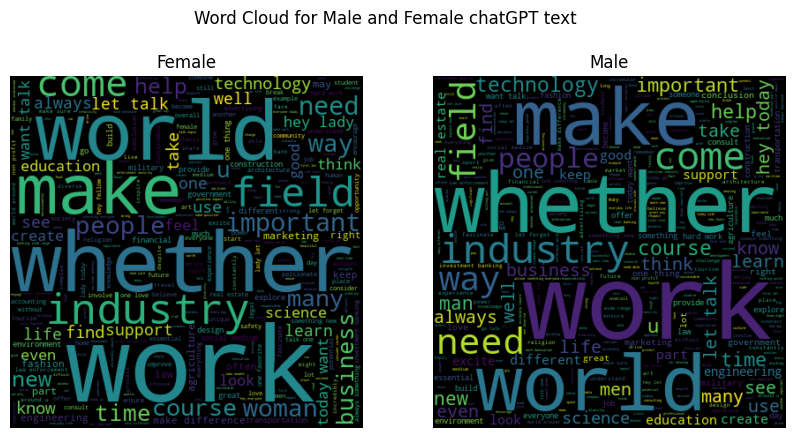

In [ ]:
from itertools import chain

# Flatten the list of lists for each gender
female_text = ' '.join(list(chain.from_iterable(chatGPT[chatGPT['gender']=='female']['tokenized'])))
male_text = ' '.join(list(chain.from_iterable(chatGPT[chatGPT['gender']=='male']['tokenized'])))

# Generate the word clouds
wordcloud_female = WordCloud(max_words=1500, width=400, height=400).generate(female_text)
wordcloud_male = WordCloud(max_words=1500, width=400, height=400).generate(male_text)

# Plot the word clouds
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.imshow(wordcloud_female, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Female')

ax2.imshow(wordcloud_male, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Male')

plt.suptitle('Word Cloud for Male and Female chatGPT text')
plt.show()


### Classification Algorithm on chatGPT dataset
<p style="text-align: justify;">
In the following, the gender column was transformed into 0 and 1 and then used the word2vec model which was trained on the Blog Authorship Corpus dataset to convert the chatGPT texts into numerical vectors. Finally the classification models were evaluated on the chatGPT texts. In the evaluation part, firstly I tested the same classification models trained on the Blog Authorship Corpus dataset on the chatGPT data. Then, I devided the chatGPT texts into train and test dataset and fitted the classification models on training data and evaluated their prediction on the training dataset. 
</p>
The classification metris for the both approaches are presented in the following tables.

Classifiers on chatGPT dataset, trained by Blog Authorship Corpus Dataset:

| Model    | LSTM | LR   | LDA  | KNN  | DTC  | RFC  | NB   |
| -------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| Accuracy | 0.50 | 0.50 | 0.42 | 0.51 | 0.51 | 0.49 | 0.50 |
| Precision| 0.50 | 0.50 | 0.42 | 0.51 | 0.51 | 0.46 | 0.50 |
| Recall   | 0.67 |   1  | 0.49 | 0.59 | 0.98 | 0.03 |   1  |
| F1 Score | 1    | 0.67 | 0.45 | 0.55 | 0.67 | 0.06 | 0.67 |
| ROC AUC  | 0.47 | 0.50 | 0.49 | 0.51 | 0.50 | 0.50 | 0.50 |

Classifiers on chatGPT dataset, trained by chatGPT Dataset:

| Model    | LSTM | LR   | LDA  | KNN  | DTC  | RFC  | NB   |
| -------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| Accuracy | 0.48 | 0.48 | 0.48 | 0.53 | 0.48 | 0.48 | 0.50 |
| Precision| 0.48 | 0.48 | 0.48 | 0.53 | 0.48 | 0.48 | 0.50 |
| Recall   | 0.49 | 0.47 | 0.47 | 0.49 | 0.47 | 0.47 | 0.94 |
| F1 Score | 0.50 | 0.47 | 0.47 | 0.51 | 0.47 | 0.47 | 0.65 |
| ROC AUC  | 0.48 | 0.47 | 0.47 | 0.51 | 0.47 | 0.47 | 0.65 |

<p style="text-align: justify;">
Based on the provided classification metrics, the classifiers trained on the Blog Authorship Corpus dataset and the chatGPT dataset did not perform well in predicting the gender of the authors of the generated texts. However, the performance of the classifiers which were trained on the Blog Authorship Corpus dataset was slightly better than those which were trained on the chatGPT dataset.
</p>

<p style="text-align: justify;">
The accuracy scores for all classifiers were around 50%, which means that they were not much better than random guessing. The precision scores were also low for most classifiers, indicating that the models were not very good at correctly predicting the gender of the authors.
</p>

<p style="text-align: justify;">
The recall scores were particularly low for the classifiers trained on the chatGPT dataset, while they were higher for the classifiers trained on the Blog Authorship Corpus dataset. A recall score of 100% for LR and NB models in the Blog Authorship Corpus dataset indicates that the model is only predicting the majority class, which in this case is the female authors, and is not able to identify any male authors.
</p>

<p style="text-align: justify;">
The ROC AUC scores were around 0.5, which is the same as random guessing, except for Naive Bayes algorithm trained on chatGPT dataset, which was 65%.
</p>

<p style="text-align: justify;">
Overall, the low classification metrics indicate that the models were not very effective in identifying the gender of the authors based on the generated texts.
</p>

In [ ]:
chatGPT['gender'] = le.fit_transform(chatGPT['gender'])
chatGPT.head()

,gender,tokenized
0,0,"[hello, everyone, today, want, talk, topic, mi..."
1,0,"[hey, lady, today, let, talk, student, woman, ..."
2,1,"[hey, today, go, talk, one, favorite, science,..."
3,0,"[accounting, language, business, account, cruc..."
4,0,"[advertise, constantly, field, significant, ro..."


In [ ]:
# Transforming the whole chatGPT texts into numerical vectors using word2vec models traind on the Blog Authorship Corpus Data

gptword2vec = pd.DataFrame(columns=['gender'] + [f'vec{i}' for i in range(100)])

# Iterate over the rows of the original DataFrame
for index, row in chatGPT.iterrows():
    model_vector = (np.mean([w2v_model.wv[token] for token in row['tokenized'] if token in w2v_model.wv.key_to_index], axis=0)).tolist()
    
    if type(model_vector) is list:  
        new_row = [row['gender']] + model_vector
    else:
        new_row = [row['gender']] + [0] * 100
        
    gptword2vec.loc[index] = new_row


In [ ]:
# LSTM model traind on on Blog Authorship Corpus Data
X_gptword2vec = np.array(gptword2vec.drop('gender', axis=1))
y_gptword2vec = np.array(gptword2vec['gender'])

# Evaluate the model
y_pred = lstm.predict(X_gptword2vec.reshape((-1, 100, 1)))

# Calculate classification metrics
confusion = confusion_matrix(y_gptword2vec, np.argmax(y_pred, axis=1))
acc = accuracy_score(y_gptword2vec, np.argmax(y_pred, axis=1))
precision = precision_score(y_gptword2vec, np.argmax(y_pred, axis=1))
f1 = f1_score(y_gptword2vec, np.argmax(y_pred, axis=1))
recall = recall_score(y_gptword2vec, np.argmax(y_pred, axis=1))
roc_auc = roc_auc_score(y_gptword2vec, y_pred[:, 1])

# Print classification metrics
print('Confusion Matrix:\n', confusion)
print('Accuracy: ', acc)
print('Precision: ', precision)
print('F1 Score: ', f1)
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)

28/28 [==============================] - 0s 14ms/step
Confusion Matrix:
 [[  0 436]
 [  0 444]]
Accuracy:  0.5045454545454545
Precision:  0.5045454545454545
F1 Score:  0.6706948640483384
Recall:  1.0
ROC AUC:  0.4896814819406563


In [ ]:
print('Classified chantGPT text using the trained algorithms on Blog Authorship Corpus Data')
print()

X_gptword2vec = gptword2vec.drop('gender', axis=1)
y_gptword2vec = gptword2vec['gender']

for name, model in models:
    model.fit(xtrain, ytrain)
    gptypred = model.predict(X_gptword2vec)
    
    accuracy = accuracy_score(y_gptword2vec, gptypred) 
    precision = precision_score(y_gptword2vec, gptypred) 
    recall = recall_score(y_gptword2vec, gptypred) 
    f1 = f1_score(y_gptword2vec, gptypred) 
    roc_auc = roc_auc_score(y_gptword2vec, gptypred) 
         
    print('Classifier:', name)
    print('Accuracy: %.2f' % accuracy)
    print('Precision: %.2f' % precision)
    print('Recall: %.2f' % recall)
    print('F1 Score: %.2f' % f1)
    print('ROC AUC:%.2f' % roc_auc)
    print()

Classified chantGPT text using the trained algorithms on Blog Authorship Corpus Data

Classifier: LR
Accuracy: 0.50
Precision: 0.50
Recall: 1.00
F1 Score: 0.67
ROC AUC:0.50

Classifier: LDA
Accuracy: 0.49
Precision: 0.49
Recall: 0.42
F1 Score: 0.45
ROC AUC:0.49

Classifier: KNN
Accuracy: 0.51
Precision: 0.51
Recall: 0.59
F1 Score: 0.55
ROC AUC:0.51

Classifier: DTC
Accuracy: 0.51
Precision: 0.51
Recall: 0.98
F1 Score: 0.67
ROC AUC:0.50

Classifier: RF
Accuracy: 0.49
Precision: 0.46
Recall: 0.03
F1 Score: 0.06
ROC AUC:0.50

Classifier: NB
Accuracy: 0.50
Precision: 0.50
Recall: 1.00
F1 Score: 0.67
ROC AUC:0.50



In [ ]:
# Splitting chatSPT texts into test and train datasets

chatGPTtrain, chatGPTtest = train_test_split(chatGPT, test_size=0.2, random_state = 18)

chatGPTxtrain = chatGPTtrain['tokenized'].reset_index()
chatGPTytrain = chatGPTtrain['gender']
chatGPTxtest = chatGPTtest['tokenized'].reset_index()
chatGPTytest = chatGPTtest['gender']
print('xtrain shape: ',chatGPTxtrain.shape)
print('ytrain shape: ',chatGPTytrain.shape)
print('xtest shape: ',chatGPTxtest.shape)
print('ytest shape: ',chatGPTytest.shape)

xtrain shape:  (704, 2)
ytrain shape:  (704,)
xtest shape:  (176, 2)
ytest shape:  (176,)


In [ ]:
# Transforming the train dataset of chatGPT texts into numerical vectors using word2vec models traind on the Blog Authorship Corpus Data

gptword2vectrain = pd.DataFrame(columns=['gender'] + [f'vec{i}' for i in range(100)])

for index, row in chatGPTtrain.iterrows():
    model_vector = (np.mean([w2v_model.wv[token] for token in row['tokenized'] if token in w2v_model.wv.key_to_index], axis=0)).tolist()
    
    if type(model_vector) is list:  
        new_row = [row['gender']] + model_vector
    else:
        new_row = [row['gender']] + [0] * 100
        
    gptword2vectrain.loc[index] = new_row


In [ ]:
# Transforming the test dataset of chatGPT texts into numerical vectors using word2vec models traind on the Blog Authorship Corpus Data

gptword2vectest = pd.DataFrame(columns=['gender'] + [f'vec{i}' for i in range(100)])

for index, row in chatGPTtest.iterrows():
    model_vector = (np.mean([w2v_model.wv[token] for token in row['tokenized'] if token in w2v_model.wv.key_to_index], axis=0)).tolist()
    
    if type(model_vector) is list:  
        new_row = [row['gender']] + model_vector
    else:
        new_row = [row['gender']] + [0] * 100
        
    gptword2vectest.loc[index] = new_row

In [ ]:
# LSTM model traind on chatGPT data
X_train = np.array(gptword2vectrain.drop('gender', axis=1))
y_train = np.array(gptword2vectrain['gender'])
X_test = np.array(gptword2vectest.drop('gender', axis=1))
y_test = np.array(gptword2vectest['gender'])

# Define the LSTM model
gpt_lstm = Sequential()
gpt_lstm.add(LSTM(128, input_shape=(100, 1)))
gpt_lstm.add(Dense(2, activation='softmax'))

# Compile the model
gpt_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
gpt_lstm.fit(X_train.reshape((-1, 100, 1)), y_train, batch_size=32, epochs=10, validation_data=(X_test.reshape((-1, 100, 1)), y_test))

# Evaluate the model
y_pred = gpt_lstm.predict(X_test.reshape((-1, 100, 1)))

# Calculate classification metrics
confusion = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
acc = accuracy_score(y_test, np.argmax(y_pred, axis=1))
precision = precision_score(y_test, np.argmax(y_pred, axis=1))
f1 = f1_score(y_test, np.argmax(y_pred, axis=1))
recall = recall_score(y_test, np.argmax(y_pred, axis=1))
roc_auc = roc_auc_score(y_test, y_pred[:, 1])

# Print classification metrics
print('Confusion Matrix:\n', confusion)
print('Accuracy: ', acc)
print('Precision: ', precision)
print('F1 Score: ', f1)
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)

Epoch 1/10
22/22 [==============================] - 3s 50ms/step - loss: 0.6944 - accuracy: 0.4830 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/10
22/22 [==============================] - 1s 34ms/step - loss: 0.6931 - accuracy: 0.5057 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
22/22 [==============================] - 1s 34ms/step - loss: 0.6933 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4886
Epoch 4/10
22/22 [==============================] - 1s 34ms/step - loss: 0.6930 - accuracy: 0.5185 - val_loss: 0.6936 - val_accuracy: 0.4773
Epoch 5/10
22/22 [==============================] - 1s 34ms/step - loss: 0.6930 - accuracy: 0.5199 - val_loss: 0.6937 - val_accuracy: 0.4830
Epoch 6/10
22/22 [==============================] - 1s 34ms/step - loss: 0.6933 - accuracy: 0.5213 - val_loss: 0.6938 - val_accuracy: 0.4773
Epoch 7/10
22/22 [==============================] - 1s 36ms/step - loss: 0.6937 - accuracy: 0.4957 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 8/10
22

In [ ]:
# Classification models traind on chatGPT data

print('Classified chantGPT text using the trained algorithms on chatGPT Data')
print()

gptxtrain = gptword2vectrain.iloc[:,1:]
gptxtest = gptword2vectest.iloc[:,1:]
gptytrain = gptword2vectrain['gender']
gptytest = gptword2vectest['gender']

for name, model in models:
    model.fit(gptxtrain,gptytrain)
    ypred = model.predict(gptxtest)
    
    accuracy = accuracy_score(gptytest, ypred) 
    precision = precision_score(gptytest, ypred)
    recall = recall_score(gptytest, ypred) 
    f1 = f1_score(gptytest, ypred) 
    roc_auc = roc_auc_score(gptytest, ypred) 
    
    print('Classifier:', name)
    print('Accuracy: %.2f' % accuracy)
    print('Precision: %.2f' % precision)
    print('Recall: %.2f' % recall)
    print('F1 Score: %.2f' % f1)
    print('ROC AUC: %.2f' % f1)
    print()

Classified chantGPT text using the trained algorithms on chatGPT Data

Classifier: LR
Accuracy: 0.48
Precision: 0.48
Recall: 0.47
F1 Score: 0.47
ROC AUC: 0.47

Classifier: LDA
Accuracy: 0.48
Precision: 0.48
Recall: 0.47
F1 Score: 0.47
ROC AUC: 0.47

Classifier: KNN
Accuracy: 0.53
Precision: 0.53
Recall: 0.49
F1 Score: 0.51
ROC AUC: 0.51

Classifier: DTC
Accuracy: 0.48
Precision: 0.48
Recall: 0.47
F1 Score: 0.47
ROC AUC: 0.47

Classifier: RF
Accuracy: 0.48
Precision: 0.48
Recall: 0.47
F1 Score: 0.47
ROC AUC: 0.47

Classifier: NB
Accuracy: 0.48
Precision: 0.48
Recall: 0.47
F1 Score: 0.47
ROC AUC: 0.47



## Conclusion

<p style="text-align: justify;">
This project aimed to evaluate whether texts generated by ChatGPT language model can be classified by gender using machine learning algorithms. The Blog Authorship Corpus dataset was used to train the word2vec and classification algorithms. The dataset was preprocessed, splitted into training and testing datasets, and transformed into numerical vectors using Word2Vec word embedding algorithm. Several classification algorithms were trained and tested on the dataset.
</p>

<p style="text-align: justify;">
Then, ChatGPT language model was used to generate texts and the same preprocessing steps were applied to clean the dataset and transform it and same classifiers were used to predict the gender on it. The overall performance of the classifier algorithms on both Blog Authorship Corpus dataset and chatGPT dataset were poor, but those of chatGPT dataset were worse. The result shows that texts generated by chatGPT cannot differentiate based on gender. Even when it is asked to create text on behalf of a specific gender or for a specific gender readers.
</p>

<p style="text-align: justify;">
Apart from the insignificant effect of gender on the text structure, the poor performance could be due to various factors, such as the complexity and variety of the blog texts, as well as the limitations of the chosen classification algorithms. There are several steps that can be done in future to improve the performance as such applying alternative feature extraction techniques and word embedding models like GloVe or fastText, or investigate the use of contextualized embeddings like BERT, which may better capture the nuances in the texts. In addition, more sophisticated deep learning architectures such as recurrent neural networks (RNNs), attention mechanisms, or transformer models which are specifically designed for text classification tasks can be used. However, gender classification based on text can be a challenging task as people may use language differently and stereotypes may not always hold true.
</p>

## Refetences
https://github.com/Niillooff/Text_Analysis-NLP

https://www.kaggle.com/datasets/rtatman/blog-authorship-corpus

https://www.researchgate.net/publication/344003069_Gender_Classification_using_Twitter_Text_Data

chatGPT was used mainly to generate texts and helped in solving codes error.